In [1]:
include("../src/GaPSE.jl");

In [2]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions

In [3]:
FILE_F_MAP = "../data/F_REFERENCE.txt"
#FILE_PS = "../data/WideA_ZA_pk.dat"
FILE_PS = "file_pk.txt"
FILE_BACKGROUND = "../data/WideA_ZA_background.dat"
#FILE_IS = "tab_xi.txt"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP; expand=false)

GaPSE.parameters_used(stdout, cosmo)

I take the input power spectrum as it is,without expanding.
# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "file_pk.txt"
# F window function input file : "../data/F_REFERENCE.txt"
# CLASS Background input file: "../data/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.19200014818588 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747095691862 Mpc/h_0
# 	 comoving z_eff = 0.15045636096027523 
# 	 Volume of the survey V_survey = 3.845366167993746e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830221
# 	 σ_3 = 3735.1227501923527
# 


In [4]:
#=
GaPSE.print_map_ξ_multipole(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_1.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-3, enhancer=1e10, μ_atol=1e-5, μ_rtol=1e-1) 

GaPSE.print_map_int_on_mu(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_2.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-4, enhancer=1e10,  μ_atol=1e-5, μ_rtol=1e-1) 
GaPSE.print_map_int_on_mu(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_3.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-5, enhancer=1e10, μ_atol=1e-5, μ_rtol=1e-1)
=#

In [5]:
#=
my_tab_1 = readdlm("AutoCorrelationTests/xi_lesnsing_L0_1.txt", comments=true);
my_tab_2 = readdlm("AutoCorrelationTests/xi_lensing_L0_2.txt", comments=true);
my_tab_3 = readdlm("AutoCorrelationTests/xi_lensing_L0_3.txt", comments=true);

ss_1 = convert(Vector{Float64}, my_tab_1[:,1]);
xis_1 = convert(Vector{Float64}, my_tab_1[:,2]); 
ss_2 = convert(Vector{Float64}, my_tab_2[:,1]);
xis_2 = convert(Vector{Float64}, my_tab_2[:,2]); 
ss_3 = convert(Vector{Float64}, my_tab_3[:,1]);
xis_3 = convert(Vector{Float64}, my_tab_3[:,2]); 
=#

In [6]:
#=
s1 = cosmo.s_eff
s2 = cosmo.s_eff + 0.0010
y = 0.999


χ1s = range(0.0, s1, length=100)
χ2s = range(0.0, s2, length=100)
mesh_χ1s = [χ1 for χ1 in χ1s for χ2 in χ2s]
mesh_χ2s = [χ2 for χ1 in χ1s for χ2 in χ2s]
zs = [GaPSE.integrand_ξ_lensing(χ1, χ2, s1, s2, y, cosmo;Δχ_min=0.01) 
    for (χ1,χ2) in zip(mesh_χ1s, mesh_χ2s)]
#zs = [χ1+χ2 for (χ1,χ2) in zip(mesh_χ1s, mesh_χ2s)]
plot(mesh_χ1s, mesh_χ2s, zs, st=:surface, size=(400, 300))
=#

In [7]:
GaPSE.ξ_multipole(cosmo.s_eff, 0.1, 
    "auto_lensing", cosmo; use_windows = false, 
          N_χs = 50, Δχ_min = 1e-2, enhancer=1e10, N_μs = 50)

1.137107160267592e-6

In [8]:
GaPSE.print_map_ξ_multipole(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, N_μs = 50, Δχ_min = 1e-4, enhancer=1e10)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


I will use quadgk.

time needed for map_integral_on_mu for auto_lensing [in s] = 62.48402 


In [9]:
my_table = readdlm("AutoCorrelationTests/xi_lensing_L0.txt", comments=true);
my_ss = convert(Vector{Float64}, my_table[:,1]);
my_lensings = convert(Vector{Float64}, my_table[:,2]);
mattia_table = readdlm("/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/Monopoles_without_window/xi_lensing_L0.txt")
mattia_ss = convert(Vector{Float64}, mattia_table[2:end, 1]);
mattia_lensings = convert(Vector{Float64}, mattia_table[2:end, 2]);
casto_table = readdlm("tab_kappa_terms.dat")
casto_ss = convert(Vector{Float64}, casto_table[3:end, 1]);
casto_lensings = convert(Vector{Float64}, casto_table[3:end, 2]);

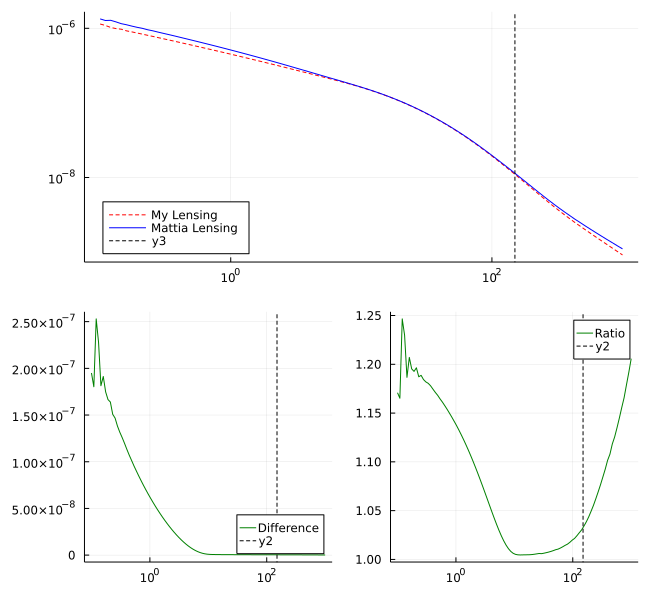

In [15]:
my_xs = my_ss
my_ys = my_lensings
xs = mattia_ss
ys = mattia_lensings
spline = Spline1D(xs, ys)
K_VLINE = 150

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, 
    
    lc=[:red :blue], 
    label=["My Lensing" "Mattia Lensing"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1,[K_VLINE], lc=:black, ls=:dash)


p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2,[K_VLINE], lc=:black, ls=:dash)

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    #ylim=(0.99,1.05)
)
vline!(p3,[K_VLINE], lc=:black, ls=:dash)

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )

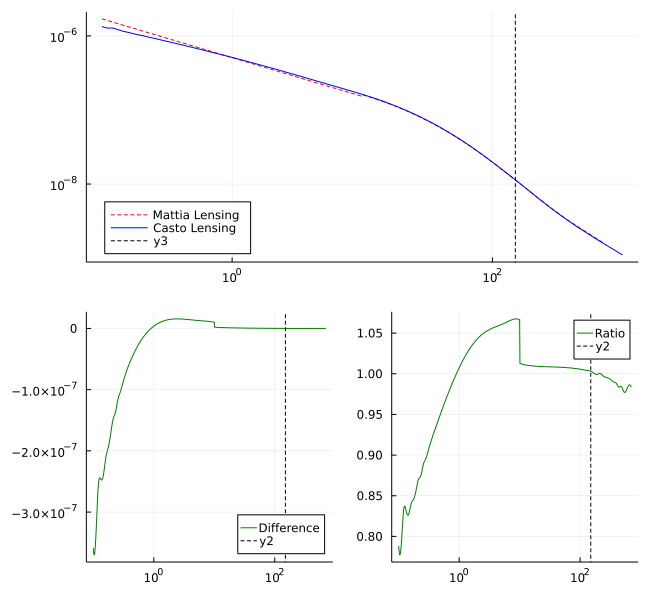

In [11]:
my_xs = casto_ss
my_ys = casto_lensings
xs = mattia_ss
ys = mattia_lensings
spline = Spline1D(xs, ys)
K_VLINE = 150

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log,yaxis=:log, 
    lc=[:red :blue], 
    label=["Mattia Lensing" "Casto Lensing"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1,[K_VLINE], lc=:black, ls=:dash)


p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2,[K_VLINE], lc=:black, ls=:dash)

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log)
    #ylim=(0.94,0.99))
vline!(p3,[K_VLINE], lc=:black, ls=:dash)

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )

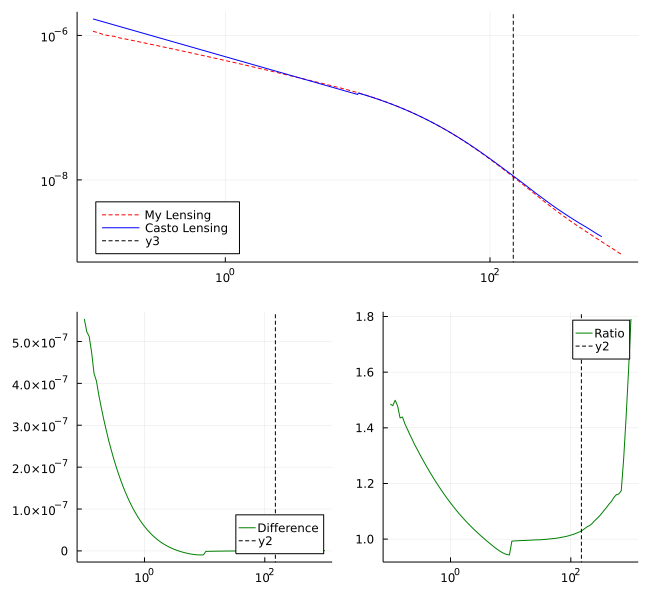

In [12]:
my_xs = my_ss
my_ys = my_lensings
xs = casto_ss
ys = casto_lensings
spline = Spline1D(xs, ys)
K_VLINE = 150

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, 
    lc=[:red :blue], 
    label=["My Lensing" "Casto Lensing"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1,[K_VLINE], lc=:black, ls=:dash)


p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2,[K_VLINE], lc=:black, ls=:dash)

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log)
    #ylim=(0.94,0.99))
vline!(p3,[K_VLINE], lc=:black, ls=:dash)

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )

In [13]:
#=
plot([casto_ss, ss_1, ss_2, ss_3, ss_prova], 
    [casto_xis, xis_1, xis_2, xis_3, xis_prova], 
    xaxis=:log, #yaxis=:log, 
    label=["Casto" "My 1" "My 2" "My 3" "prova"], 
    lc=[:red :blue :green :purple :black],
    ls = [:solid :dash :dash :dash :dot])
=#